In [46]:
from google.colab import files
files.upload()

Saving dataset1.csv to dataset1.csv


{'dataset1.csv': b'Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,FR_PBIDTM (%),FR_PATM (%),FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,2448.54,489.82,293.92,342.23,1.16,25.77,13.29,1.93,0.63,21.30,10.86,9.75,49.18,6.28,0.49\r\n3M India Ltd.,1086.86,138.45,92.84,105.97,1.14,23.55,35.88,0.00,2.08,14.17,8.31,0.00,14.56,17.49,2.32\r\nABB India Ltd.,6237.20,547.68,354.64,354.49,1.00,15.71,25.33,0.00,1.18,9.55,5.46,11.95,25.46,20.56,2.38\r\nAccelya Solutions India Ltd.,165.92,39.91,26.03,28.08,1.08,24.02,25.64,0.04,1.11,24.76,15.92,10.61,28.97,1.75,0.57\r\nAegis Logistics Ltd.,305.33,72.21,43.03,32.77,0.76,24.55,22.50,0.69,0.83,25.93,14.09,25.08,16.72,5.48,0.92\r\nAffle (India) Ltd.,5.52,0.21,0.06,#N/A,#N/A,0.00,1.95,-0.06,0.97,3.78,1.17,0.00,#N/A,0.00,0.00\r\nAgro Tech Foods Ltd.,649.57,25.84,25.14,13.96,0.56,17.92,23.85,0.00,2.64,5.62,3.87,14.54,20.79,15.28,0.65\r\nAkzo Nobel India Ltd.,

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
data = pd.read_csv('dataset1.csv')

In [49]:
data.head()

,Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,FR_PBIDTM (%),FR_PATM (%),FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,2448.54,489.82,293.92,342.23,1.16,25.77,13.29,1.93,0.63,21.30,10.86,9.75,49.18,6.28,0.49
1,3M India Ltd.,1086.86,138.45,92.84,105.97,1.14,23.55,35.88,0.00,2.08,14.17,8.31,0.00,14.56,17.49,2.32
2,ABB India Ltd.,6237.20,547.68,354.64,354.49,1.00,15.71,25.33,0.00,1.18,9.55,5.46,11.95,25.46,20.56,2.38
3,Accelya Solutions India Ltd.,165.92,39.91,26.03,28.08,1.08,24.02,25.64,0.04,1.11,24.76,15.92,10.61,28.97,1.75,0.57
4,Aegis Logistics Ltd.,305.33,72.21,43.03,32.77,0.76,24.55,22.50,0.69,0.83,25.93,14.09,25.08,16.72,5.48,0.92


In [50]:
test = data.iloc[:,:]

In [51]:
data = data.replace( ' -   ', np.nan)


In [52]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [53]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [54]:
data.fillna(data.mean(), inplace=True)

# **Ev/EBITDA Prediction**

In [55]:
data1 = data.iloc[:,:-1 ]

In [56]:
data1.head()


,Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,FR_PBIDTM (%),FR_PATM (%),FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA
0,3I Infotech Ltd.,2448.54,489.82,293.92,342.23,1.16,25.77,13.29,1.93,0.63,21.30,10.86,9.75,49.18,6.28
1,3M India Ltd.,1086.86,138.45,92.84,105.97,1.14,23.55,35.88,0.00,2.08,14.17,8.31,0.00,14.56,17.49
2,ABB India Ltd.,6237.20,547.68,354.64,354.49,1.00,15.71,25.33,0.00,1.18,9.55,5.46,11.95,25.46,20.56
3,Accelya Solutions India Ltd.,165.92,39.91,26.03,28.08,1.08,24.02,25.64,0.04,1.11,24.76,15.92,10.61,28.97,1.75
4,Aegis Logistics Ltd.,305.33,72.21,43.03,32.77,0.76,24.55,22.50,0.69,0.83,25.93,14.09,25.08,16.72,5.48


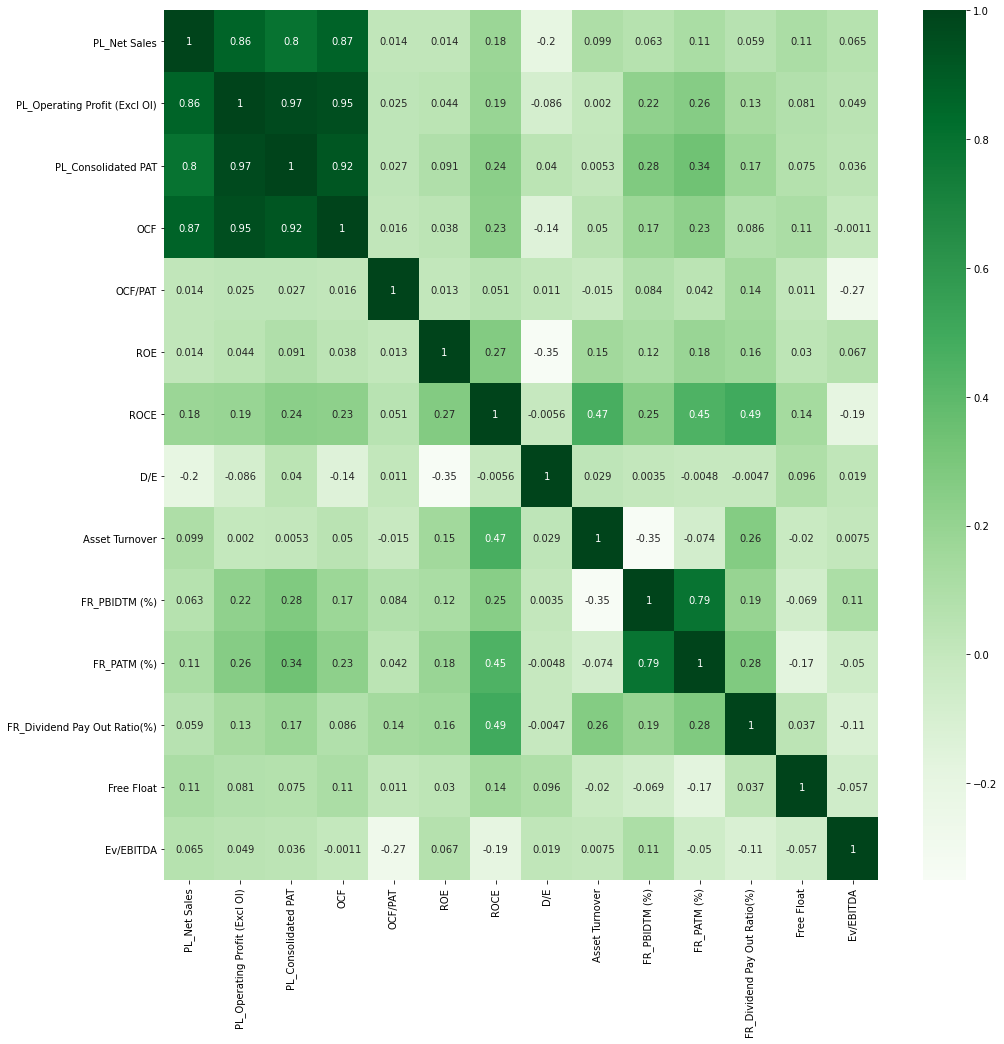

In [57]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [58]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.0666]
relevant_features.index

Index(['OCF/PAT', 'ROE', 'ROCE', 'FR_PBIDTM (%)',
       'FR_Dividend Pay Out Ratio(%)', 'Ev/EBITDA'],
      dtype='object')

In [59]:
X,y = data1[['OCF/PAT', 'ROE', 'ROCE', 'FR_PBIDTM (%)',
       'FR_Dividend Pay Out Ratio(%)']], data1['Ev/EBITDA']

In [ ]:
'''from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)'''

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [65]:
X_train

,OCF/PAT,ROE,ROCE,FR_PBIDTM (%),FR_Dividend Pay Out Ratio(%)
135,2.49,25.03,9.90,6.16,0.00
45,0.00,-1304.27,-1.98,7.08,0.00
119,3.74,9.48,9.23,14.33,0.00
27,1.49,78.52,120.05,22.17,81.12
4,0.76,24.55,22.50,25.93,25.08
...,...,...,...,...,...
71,1.20,35.18,47.62,16.28,6.66
106,0.92,19.86,22.93,32.79,0.00
14,0.30,6.34,6.54,32.39,34.17
92,1.30,22.23,33.11,34.46,30.38


In [66]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [67]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 16.60832
 1 XGBRegressor            19.11226
 2 RidgeCV                 16.50376
 3 BayesianRidge           16.59281
 4 ARDRegression           16.70668
 5 ElasticNetCV            16.61595
 6 LassoLarsCV             16.60832
 7 SVR                     16.58644


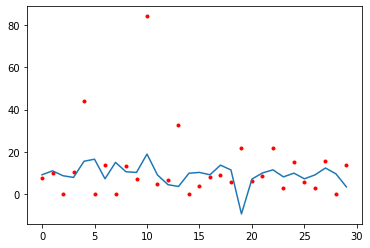

In [68]:
#plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[2])


In [ ]:
#data1['PE'].plot.kde()

# **M/Sales Prediction**

In [69]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [70]:
data2.head()

,Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,FR_PBIDTM (%),FR_PATM (%),FR_Dividend Pay Out Ratio(%),Free Float,M/Sales
0,3I Infotech Ltd.,2448.54,489.82,293.92,342.23,1.16,25.77,13.29,1.93,0.63,21.30,10.86,9.75,49.18,0.49
1,3M India Ltd.,1086.86,138.45,92.84,105.97,1.14,23.55,35.88,0.00,2.08,14.17,8.31,0.00,14.56,2.32
2,ABB India Ltd.,6237.20,547.68,354.64,354.49,1.00,15.71,25.33,0.00,1.18,9.55,5.46,11.95,25.46,2.38
3,Accelya Solutions India Ltd.,165.92,39.91,26.03,28.08,1.08,24.02,25.64,0.04,1.11,24.76,15.92,10.61,28.97,0.57
4,Aegis Logistics Ltd.,305.33,72.21,43.03,32.77,0.76,24.55,22.50,0.69,0.83,25.93,14.09,25.08,16.72,0.92


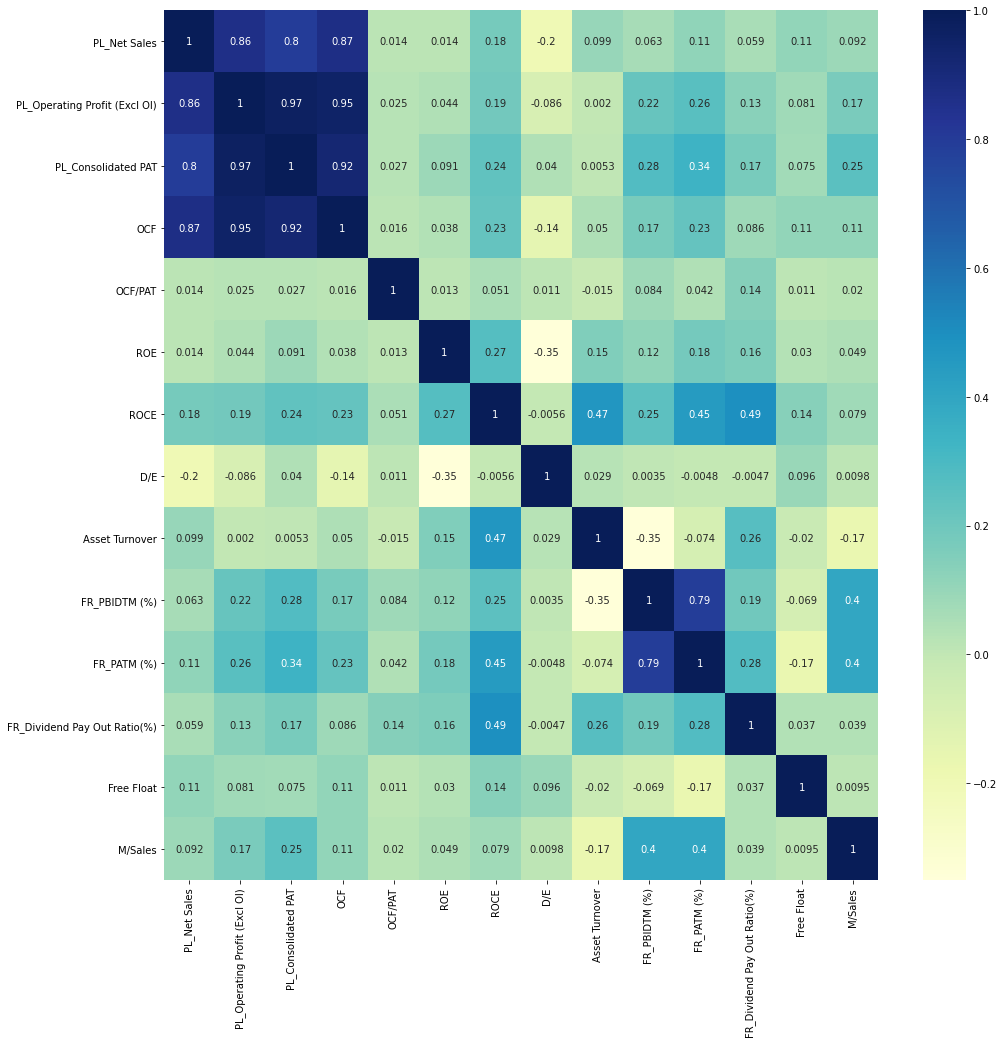

In [71]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [75]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>0.15]
relevant_features.index

Index(['PL_Operating Profit (Excl OI)', 'PL_Consolidated PAT',
       'Asset Turnover', 'FR_PBIDTM (%)', 'FR_PATM (%)', 'M/Sales'],
      dtype='object')

In [76]:
X,y = data2[['PL_Operating Profit (Excl OI)', 'PL_Consolidated PAT',
       'Asset Turnover', 'FR_PBIDTM (%)', 'FR_PATM (%)']], data2['M/Sales']

In [ ]:
'''from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)'''

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [78]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [79]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 8.2425980790
 1 XGBRegressor            9.0891180246
 2 RidgeCV                 16.3175627807
 3 BayesianRidge           11.5633568749
 4 ARDRegression           13.9154148649
 5 ElasticNetCV            8.4956546752
 6 LassoLarsCV             8.3297613551
 7 SVR                     8.2450242210


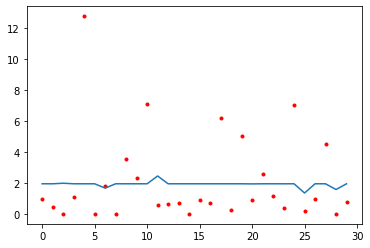

In [82]:
#plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[7])
